# Дисперсионный анализ


Целью дисперсионного анализа является исследование различий между выборочных средних. В отличинии от t критерия позволяет сравнивать средние более двух групп. Несмотря на то что целью анализя является поиск различий в средних, фактически исследуют дисперсии выборок, откуда и пошло названия анализа - дисперсионного. \

Простейшим случаем дисперсионного анализа является одномерный однофакторный анализ для двух или нескольких независимых групп, когда все группы объединены по одному признаку. В ходе анализа проверяется нулевая гипотеза о равенстве средних. При анализе двух групп дисперсионный анализ тождественен двухвыборочному t-критерию Стьюдента для независимых выборок, и величина F-статистики равна квадрату соответствующей t-статистики.

## Однофакторный дисперсионный анализ

Алгоритм однофакторного дисперсионного анализа

In [35]:
import math
from scipy import stats
import numpy as np
import random
import matplotlib as mpl
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns


rcParams['figure.figsize'] = 10, 6
PATH = "/Users/daria/stepikcourse/"

In [23]:
# зададим 3 случайных выборки 
gen_pop = [random.randint(0, 100) for i in range(0, 10000)] # зададим генеральную совокупность из псевдослучайных величин от 0 до 100 объемом 10000
samps = [[random.choice(gen_pop) for i in range(0, 9)] for j in range(0, 3)] # сделаем 3 выборки размером 9 элементов из этой ГС

Выдвенем гипотезы: \
H0 - мат. ожидания выборок равны М1=М2=М3 \
H1 - мат. ожидания выборок НЕ равны М1!=М2!=М3

In [7]:
def onewayanova(samples): # samples - массив выборок
    m = len(samples) # вычислим количество выборок в массиве
    n = 0 # общее кол-во элементов
    summ = 0 # общая сумма всех членов выборок
    size = 0 # общий размер всех выборок 
    x = 0 # общее среднее
    sst = 0 # sum of squares total
    ssw = 0 # sum of squares within
    ssb = 0 # sum of squares between 
    f = 0 # критерий
    
    for i in range(0, m):
        summ = summ + sum(samples[i])
        size = size + len(samples[i])
        x = summ / size 
    
    for i in range(0, m): 
        
        for j in samples[i]:         
            sst = sst + (j - x) ** 2
            ssw = ssw + (j - np.mean(samples[i])) ** 2
        
        ssb = ssb + len(samples[i]) * (np.mean(samples[i]) - x) ** 2 
    
    for i in range(0, m):
        n = n + len(samples[i])
        
    msbg = ssb / (m - 1) # межгрупповой средний квадрат 
    mswg = ssw / (n - m) # внутригрупповой средний квадрат
    f = msbg / mswg
        
    return f

In [24]:
onewayanova(samps)

0.6369520839530991

In [25]:
f, p = stats.f_oneway(samps[0], samps[1], samps[2]) # вычислим f статистику при помощи программного пакета scipy
p

0.5376094417980138

При предположении о том, что верна Н0 (средние выборок равны т.к они взяты из одной генеральной совокупности и различаются статически незначимо только за счет малого объема выборок) межгрупповая изменчивость в числителе F критерия будет стремиться к 0 и сам F критерий будет принимать малые значения. Зная значения F критерия можно вычислить вероятность получения такого или более значимого различия при верности Н0

In [27]:
if p < 0.05:
    print(f'p_value = {round(p, 2)} < 0.05. Принимается гипотеза Н1')
else:
    print(f'p_value = {round(p, 2)} > 0.05. Условий для отклонения Н0 нет')

p_value = 0.54 > 0.05. Условий для отклонения Н0 нет


Задача:\
Даны 4 виды терапии, увеличивающие экспрессию гена. Терапии применили к испытуемым в 4 группах и получили новые данные по экспрессии гена в каждой из групп. Определить повлияла ли значимо хотя бы одна терапия на экспрессию гена. \
Сформулируем гипотезы \
Н0 М1=М2=М3=М4 - среднее в ген. совокупности будет одинаковое при использовании терапии всех 4 типов  \
Н1 М1!=М2!=М3!=М4 - хотя бы одна терапия окажет значимое различие 

In [36]:
URL = PATH + 'genetherapy.csv'
data = pd.read_csv(URL)
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


/Users/daria/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


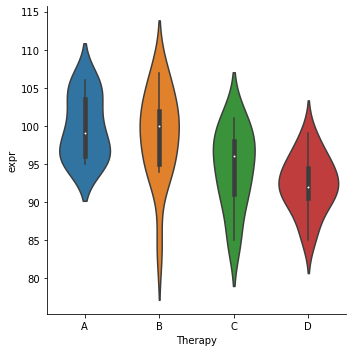

In [32]:
sns.axes_style(style='ticks')
g = sns.catplot("Therapy", "expr", data=data, kind="violin")

In [33]:
terapy_kind = ['A', 'B', 'C', 'D']
expr = [np.array(data[data['Therapy'] == i]['expr']) for i in terapy_kind]

f, p = stats.f_oneway(expr[0], expr[1], expr[2], expr[3])
print(f'pvalue - {round(p, 5)}')

pvalue - 0.00015


Вывод: уровень pvalue < 0.05. Значит значит среднее как минимум одной терапии имеет статичетически значимое различие. Гипотезу Н0 можно отклонить 